# Salary Analysis A01423983

Predict the salary of a person based on their years of experience. The method to be used is K-Nearest Neighbors Regressor.

The dataset is available at [Salary Data](https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer)


In [84]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [85]:
# Load the data

df = pd.read_csv('Salary Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [86]:
# Check for null values

df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [87]:
# Remove the null values

df.dropna(inplace=True)

In [88]:
#  Describe the data

df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [89]:
# Check the data types

df.dtypes 

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [90]:
# Transform gender to binary

def gender_to_numeric(gender):
    if gender == "Male":
        return 0
    if gender == "Female":
        return 1
    return -1

df['Gender'] = df['Gender'].apply(lambda x: gender_to_numeric(x))
df['Gender'] = df['Gender'].astype(bool)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,False,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,True,Master's,Data Analyst,3.0,65000.0
2,45.0,False,PhD,Senior Manager,15.0,150000.0
3,36.0,True,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,False,Master's,Director,20.0,200000.0


In [91]:
# Check for unique values in education level

df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD'], dtype=object)

In [92]:
# Check for unique values in job title

df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

Quitamos la columna de $job$ $title$ porque hacer un analisis de texto es un poco mas complicado y hacer one hot encoding de esta columna nos generaria demasiadas columnas.

In [93]:
# Drop the job title column

df.drop('Job Title', axis=1, inplace=True)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,False,Bachelor's,5.0,90000.0
1,28.0,True,Master's,3.0,65000.0
2,45.0,False,PhD,15.0,150000.0
3,36.0,True,Bachelor's,7.0,60000.0
4,52.0,False,Master's,20.0,200000.0


In [94]:
# One hot encode the education level

df = pd.get_dummies(df, columns=['Education Level'])
df.head()

,Age,Gender,Years of Experience,Salary,Education Level_Bachelor's,Education Level_Master's,Education Level_PhD
0,32.0,False,5.0,90000.0,True,False,False
1,28.0,True,3.0,65000.0,False,True,False
2,45.0,False,15.0,150000.0,False,False,True
3,36.0,True,7.0,60000.0,True,False,False
4,52.0,False,20.0,200000.0,False,True,False


In [95]:
# Check the data types

df.dtypes 

Age                           float64
Gender                           bool
Years of Experience           float64
Salary                        float64
Education Level_Bachelor's       bool
Education Level_Master's         bool
Education Level_PhD              bool
dtype: object

In [96]:
# Split the data into training, testing, and validation sets



In [97]:
# K-Nearest Neighbors

# Split the data into training, testing, and validation sets

X = df.drop('Salary', axis=1)
y = df['Salary']

In [98]:
# Split the data into training, testing, and validation sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape)
print(X_test.shape)
#print(X_val.shape)

(335, 6)
(38, 6)


In [99]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_val = scaler.transform(X_val)

In [100]:
# Maximize k value using cross validation

k_values = [i for i in range (1,100)]
scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

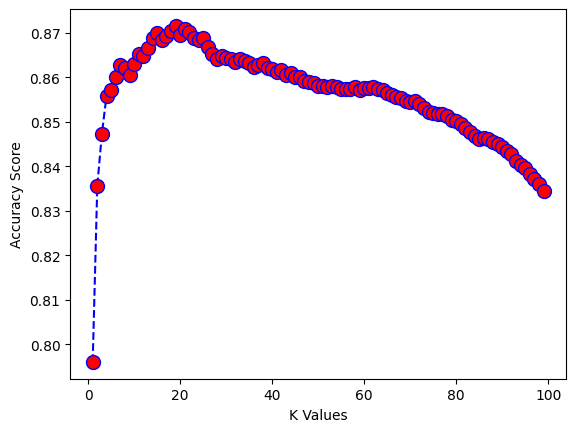

In [101]:
# Visualize the accuracy through k values

plt.plot(k_values, scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

plt.show()

In [102]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

score = cross_val_score(knn, X, y, cv=5)
print(score.mean())

0.8715075988941641


In [103]:
y_pred = knn.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 10103.393351800554


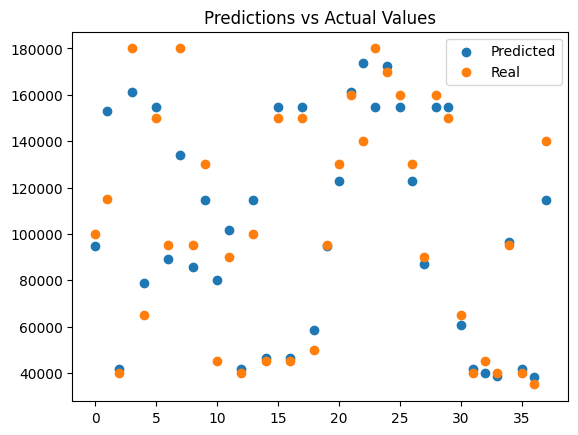

In [104]:
# Plot the predictions vs the actual values in validation set

y_pred = knn.predict(X_test)

plt.scatter(range(0, len(y_pred)), y_pred)
plt.scatter(range(0, len(y_test)), y_test)
plt.title('Predictions vs Actual Values')
plt.legend(['Predicted', 'Real'])
plt.show()

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 10103.393351800554


In [106]:
# Show in console the predictions vs the actual values in validation set

from prettytable import PrettyTable
t = PrettyTable(['Predicted value', 'Real value', 'Difference'])

for i in range(0, len(y_pred)):
    t.add_row([round(y_pred[i], 2), y_test.values[i], round(y_pred[i] - y_test.values[i], 2)])
    
print(t)

+-----------------+------------+------------+
| Predicted value | Real value | Difference |
+-----------------+------------+------------+
|     94736.84    |  100000.0  |  -5263.16  |
|    153157.89    |  115000.0  |  38157.89  |
|     41842.11    |  40000.0   |  1842.11   |
|    161052.63    |  180000.0  | -18947.37  |
|     78684.21    |  65000.0   |  13684.21  |
|    154736.84    |  150000.0  |  4736.84   |
|     89210.53    |  95000.0   |  -5789.47  |
|    133947.37    |  180000.0  | -46052.63  |
|     85526.32    |  95000.0   |  -9473.68  |
|    114736.84    |  130000.0  | -15263.16  |
|     80000.0     |  45000.0   |  35000.0   |
|    101578.95    |  90000.0   |  11578.95  |
|     41842.11    |  40000.0   |  1842.11   |
|    114736.84    |  100000.0  |  14736.84  |
|     46578.95    |  45000.0   |  1578.95   |
|    154736.84    |  150000.0  |  4736.84   |
|     46578.95    |  45000.0   |  1578.95   |
|    154736.84    |  150000.0  |  4736.84   |
|     58421.05    |  50000.0   |  

# Reporte

## Modelo escogido

Escogí el modelo de mi segunda entrega, ya que se adapta mejor a las demostraciones de las competencias. Este modelo es una predicción de regresión usando el algoritmo de K-Nearest Neighbors. El objetivo es predecir el salario una persona en base a sus años de experiencia, género, nivel de educación y edad.

## 1. Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation)

Después de limpiar los datos (eliminar valores nulos, eliminar columnas innecesarias, etc.) separamos los datos en dos conjuntos: uno de entrenamiento y otro de prueba. El conjunto de entrenamiento es el 95% de los datos y el conjunto de prueba es el 5% de los datos. En este caso no utilicé un conjunto de validación cómo tal, ya que no es necesario para este modelo. La librería de sklearn hace una separación del conjunto de entrenamiento en un conjunto de entrenamiento y un conjunto de validación. Se podría decir que el conjunto de validación está incluido en el conjunto de entrenamiento.

Mi entendimiento de los diferentes tipos de conjuntos es el siguiente:

- Conjunto de entrenamiento: Es el conjunto de datos que se utiliza para entrenar el modelo. Es decir, el modelo se entrena con estos datos para que pueda aprender a predecir.
- Conjunto de prueba: En el aprendizaje supervisado se utiliza este conjunto para ajustar los parámetros del modelo. Esto reduce el bias y el sesgo.
- Conjunto de validación: Este conjunto se utiliza para medir el rendimiento del modelo. Principalmente sirve cómo métrica final el modelo.

## 2. Diagnóstico y explicación del grado de bias o sesgo: bajo medio alto

En mi modelo, el sesgo se trata a través del valor de $K$. Si el valor de $K$ es muy bajo, habrá poco sesgo, pero la precisión no sería la más acertada. Por otro lado, si el valor de $K$ es muy alto, habrá mucho sesgo. Fue importante encontrar un punto óptimo entre el sesgo y el cross-validation score. En mi caso, el valor que maximizó el cross-validation score fue $K=19$. Se creó un poco de sesgo, pero la precisión fue la más alta. Diría que el sesgo es bajo-medio.

![Alt text](image.png)

## 3. Diagnóstico y explicación el grado de varianza: bajo medio alto

Para mi modelo en específico, no existe la métrica de varianza, pero se utiliza el cross-validation score. Siempre se desea que la varianza sea baja, ya que eso permite dar predicciones constantes. Sin embargo, si la predicción es muy ajustada, pero no se acerca a los valores reales, es posible que siempre exista un error en la predicción. El resultado mostraba una precisión cercana al 0.87%. Por lo tanto, considero que la varianza es baja.

## 4. Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

Al maximizar el valor de $k$ evitamos tanto el underfitting como el overfitting. Conforme avanza el valor de $k$, el modelo se vuelve más preciso, evitando el underfitting. Sin embargo, si el valor de $k$ es muy grande, el modelo se vuelve muy específico y puede caer en overfitting. Es por eso por lo que la métrica de cross validation nos ayuda a encontrar el valor de $k$ que nos da el mejor balance entre overfitting y underfitting. En la gráfica previa se presenta una línea que muestra como la precisión sube y después baja. Finalmente escogemos el valor de $k$ que mejores resultados da al compararse con un set de prueba.

## Mejoras

Cómo se menciona arriba, el entendimiento de los diferentes parámetros para medir un modelo me permitió encontrar la mejor configuración de hiperparámetros. Encontré un balance entre el sesgo y la precisión. Sin embargo, el modelo aún puede mejorarse. Un punto de mejora sería aumentar la cantidad de datos. Esto permitiría que el modelo aprenda de mayores ejemplos; aumentar el tamaño de $k$ sin alcanzar un overfitting y al mismo tiempo reducir el sesgo. La mayor mejora al modelo fue encontrar el valor $k$ ideal.